In [3]:
package Dynamics {
	import ScalarValues::Real;
	import ISQ::*;
	
	// Function definitions
	
	calc def Power {
		in whlpwr : PowerValue; in Cd : Real; in Cf : Real; in tm : MassValue; in v : SpeedValue;
		return tp : PowerValue = whlpwr - Cd * v - Cf * tm * v;
	}
	
	calc def Acceleration { in dt : TimeValue; in tm : MassValue; in tp: PowerValue; 
		return a : AccelerationValue = tp * dt * tp;
	}
	
	calc def Velocity { in dt : TimeValue; in v0 : SpeedValue; in a : AccelerationValue;
		return v : SpeedValue = v0 + a * dt;
	}
 	
	calc def Position { in dt : TimeValue; in x0 : LengthValue; in v : SpeedValue; 
		return: LengthValue = x0 + v * dt;
	}

	// Analysis action def
	
	action def StraightLineVehicleDynamics {
		
		in attribute dt : TimeValue;
		in attribute whlpwr : PowerValue;
		in attribute Cd : Real;
		in attribute Cf: Real;
		in attribute tm : MassValue;
		in attribute v_in : SpeedValue;
		in attribute x_in : LengthValue;
		
		out attribute a_out : AccelerationValue;
		out attribute v_out : SpeedValue;
		out attribute x_out : LengthValue;
			
		assert constraint {
			attribute tp : PowerValue;
			
			tp == Power(whlpwr, Cd, Cf, tm, v_in) &
			a_out == Acceleration(dt, tm, tp) &
			v_out == Velocity(dt, v_in, a_out) &
			x_out == Position(dt, x_in, v_in)
		}
	}
	

	// Analysis actions
	
	action dyn1 : StraightLineVehicleDynamics {
		attribute tp : PowerValue = Power(whlpwr, Cd, Cf, tm, v_in);
		
		out attribute :>> a_out : AccelerationValue = Acceleration(dt, tm, tp);
		out attribute :>> v_out : SpeedValue = Velocity(dt, v_in, a_out);
		out attribute :>> x_out : LengthValue = Position(dt, x_in, v_in);
	}	
	
	action dyn2 : StraightLineVehicleDynamics {
		calc acc : Acceleration {
			in dt = dyn2::dt;
			in tm = dyn2::tm;
			in tp = Power(whlpwr, Cd, Cf, tm, v_in);
			return a = a_out;
		}
		
		calc vel : Velocity {
			in dt = dyn2::dt;
			in v0 = dyn2::v_in; 
			in a = acc.a;
			return v = v_out;
		}
		
		calc pos : Position {
			in dt = dyn2::dt;
			in x0 = dyn2::x_in;
			in v0 = vel.v;
		  	return x = x_out;		
		}
	}
}

Package Dynamics (81e6b225-bf5d-49c8-85ec-d5c5dbed58d1)


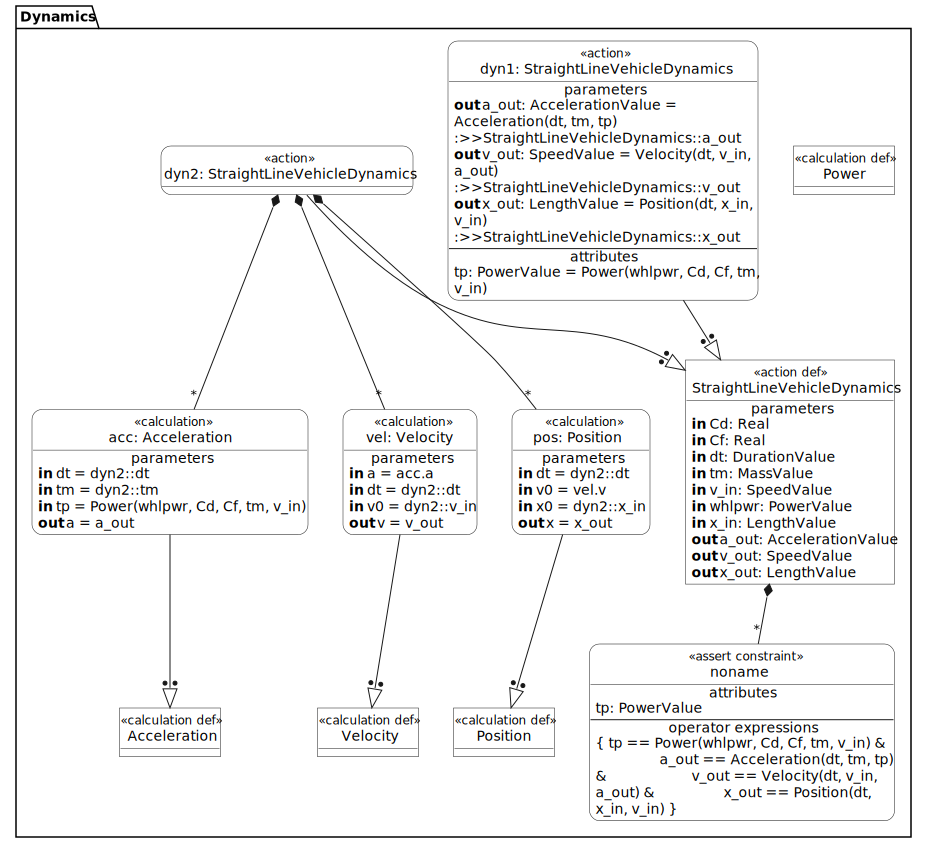

In [4]:
%viz --view=tree Dynamics